# LSTM Models For Univariate Time Series Forecasting

In [9]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


In [10]:
# Days -->   1    2    3    4    5    6    7    8    9
# Valuses  [110, 125, 133, 146, 158, 172, 187, 196, 210]

# Predict at Day 10 ??
# DATA PREPROCESSING (TimeSteps = 3)
#        X                Y
#   t1  t2    t3
#  110  125   133        146
#  125  133   146        158

In [11]:
def prepareDataModel(timeSeries, timeSteps):
    x, y = [], []
    for i in range(len(timeSeries)):
      # Find end of Particular Pattern
      endIdx = i + timeSteps
      # Pattern Should be Within the range
      if endIdx > len(timeSeries) - 1:
        break
      # Gather Input and Output
      seqX , seqY = timeSeries[i:endIdx], timeSeries[endIdx]
      x.append(seqX)
      y.append(seqY)
    return np.array(x), np.array(y)

In [12]:
# Input Sequence
timeSeries = [110, 125, 133, 146, 158, 172, 187, 196, 210]
timeSteps = 3
x, y = prepareDataModel(timeSeries, timeSteps)

In [13]:
print(x), print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [15]:
x.shape   # 6 --> No of records,  3--> TimeSteps

(6, 3)

In [16]:
# Reshape from [samples, timesteps] into [samples, timesteps, features]
features = 1
x = x.reshape(x.shape[0], x.shape[1], features)
print(x.shape)

(6, 3, 1)


In [24]:
# Defining model

model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(timeSteps, features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss = 'mse', )
model.fit(x, y, epochs=300, verbose=1)

Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 32239.5781
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 31665.2578
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 31041.0625
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 30464.3535
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 29896.2344
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 29225.2910
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 28482.4707
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 27730.4902
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 26984.8027
Epoch 10/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 26220.1465
Epoch 11/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 25406.3223
Epoch 12/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 24526.8906
Epoch 13/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 23579.7656
Epoch 14/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 22557.2441
Epoch 15/300
1/1 ━━━━━━━━━━━━━━

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 3, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

In [26]:
# Prediction For Next 10 Days
xInput = np.array([187, 196, 210])  # First 3 Days Input
tempInput = list(xInput)
lstOutput = []
i = 0;
while(i<10):
  if(len(tempInput)>3):
    xInput = np.array(tempInput[1:])
    print("{}, {}".format(i, xInput))
    xInput = xInput.reshape((1, timeSteps, features))
    yhat = model.predict(xInput, verbose=0)
    print(yhat)
    print("{} day output {}".format(i, yhat))
    tempInput.append(yhat[0][0])
    tempInput = tempInput[1:]
    lstOutput.append(yhat[0][0])
    i = i+1
  else:
    xInput = xInput.reshape(1, timeSteps, features)
    yhat = model.predict(xInput, verbose=0)
    print(yhat[0])
    tempInput.append(yhat[0][0])
    lstOutput.append(yhat[0][0])
    i = i+1;

[225.4272]
1, [196.         210.         225.42720032]
[[237.88591]]
1 day output [[237.88591]]
2, [210.         225.42720032 237.88591003]
[[252.92058]]
2 day output [[252.92058]]
3, [225.4272  237.88591 252.92058]
[[268.4832]]
3 day output [[268.4832]]
4, [237.88591 252.92058 268.4832 ]
[[283.44525]]
4 day output [[283.44525]]
5, [252.92058 268.4832  283.44525]
[[299.8494]]
5 day output [[299.8494]]
6, [268.4832  283.44525 299.8494 ]
[[316.7755]]
6 day output [[316.7755]]
7, [283.44525 299.8494  316.7755 ]
[[334.03006]]
7 day output [[334.03006]]
8, [299.8494  316.7755  334.03006]
[[352.35782]]
8 day output [[352.35782]]
9, [316.7755  334.03006 352.35782]
[[371.42673]]
9 day output [[371.42673]]


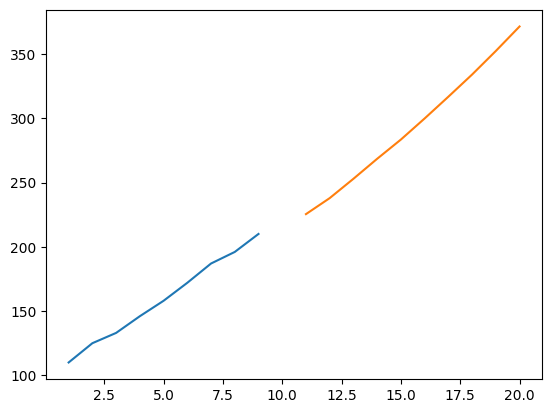

In [35]:
import matplotlib.pyplot as plt

days = [1,2,3,4,5,6,7,8,9]
predDays = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
plt.plot(days, timeSeries)
plt.plot(predDays, lstOutput)
plt.show()